In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm



In [2]:
suicide_data= pd.read_csv('C:/Users/vishu/Downloads/suicide_rate.csv')

In [3]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide_data.shape

(27820, 12)

In [5]:
suicide_data.info

<bound method DataFrame.info of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0             

In [39]:
suicide_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,23539.000000,23539.000000,2.353900e+04,23539.000000,7207.000000,23539.000000
mean,2001.290157,286.691023,2.161400e+06,15.146940,0.778965,17229.711712
std,8.456363,974.183210,4.171983e+06,19.738891,0.096353,19107.377741
min,1985.000000,1.000000,8.890000e+02,0.020000,0.483000,251.000000
25%,1995.000000,8.000000,2.387225e+05,2.780000,0.711000,3293.000000
50%,2002.000000,42.000000,5.884300e+05,8.260000,0.782000,9667.000000
75%,2009.000000,175.000000,2.107592e+06,19.560000,0.864000,25735.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
suicide_data.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
'''grouping the data by country and drop the year column'''
suicide_data.groupby(['country']).mean().drop(['year'], axis=1).head()                    

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,
Albania,7.462121,2.360813e+05,3.502879,0.673000,1859.045455
Antigua and Barbuda,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
Argentina,221.018817,2.784907e+06,10.469328,0.779600,7914.096774
Armenia,6.392617,2.595576e+05,3.275872,0.690125,1873.919463
Aruba,0.601190,7.498077e+03,9.503095,NaN,24221.642857


# Data Cleaning

In [9]:
'''
   1. country_data :to separate the data by country.  
   2. Incomplete suicide rate data ,GDP, and HDI data have also been cleaned out
'''
country_data = suicide_data.groupby(['country', 'year']).sum()
country_data['suicides/100k pop'] = country_data.apply(lambda row: row.suicides_no * 1.0 / row.population * 100000, axis=1)


country_data = country_data.rename(index=str, columns={"HDI for year": "HDI_for_year", "gdp_per_capita ($)": "gdp_per_capita", "suicides/100k pop":"suicides_per_100k_pop"})
country_data= country_data[country_data['suicides_per_100k_pop'] != 0]
country_data = country_data[country_data['HDI_for_year'] != 0]
country_data = country_data[country_data['gdp_per_capita'] != 0]

country_data.head()

suicides_no  population  suicides_per_100k_pop  HDI_for_year  \
country   year                                                                 
Albania   1995           88     2903400               3.030929         7.428   
          2000           54     2796300               1.931123         7.872   
          2010           96     2736025               3.508740         8.664   
Argentina 1985         1988    27090800               7.338285         8.328   
          1990         2140    29091100               7.356202         8.460   

                gdp_per_capita  
country   year                  
Albania   1995           10020  
          2000           15588  
          2010           52308  
Argentina 1985           39168  
          1990           58308

In [10]:
'''We will retrieve data from United States and Uzbekistan for relationship between GDP and suicide rate and relationship between HDI and suicide rate as USA is a representative of first world country and Uzbekistan as a representative of a thirld world country'''

'We will retrieve data from United States and Uzbekistan for relationship between GDP and suicide rate and relationship between HDI and suicide rate as USA is a representative of first world country and Uzbekistan as a representative of a thirld world country'

In [11]:
'''
    Retrieve data from only United states
'''
united_data = country_data.loc['United States']
united_data.head()

,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita
year,,,,,
1985,29446,220723000,13.340703,10.092,236316
1990,30895,229952200,13.435401,10.308,312048
1995,31272,243164200,12.860446,10.512,378216
2000,29343,262246108,11.189108,10.596,470616
2005,32629,276106680,11.817534,10.764,569076


In [12]:
'''
    Retrieve data from only Uzbekistan
'''
uzb_data = country_data.loc['Uzbekistan']
uzb_data.head()

,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita
year,,,,,
2000,1919,21789067,8.807169,7.128,7584
2005,1221,23600347,5.173653,7.500,7272
2010,1464,25651783,5.707206,7.860,18396
2011,1640,25978049,6.313022,7.932,21204
2012,1835,26381830,6.955545,8.016,23568


# Data analysis and visualization

Text(0, 0.5, 'suicides / 100k group')

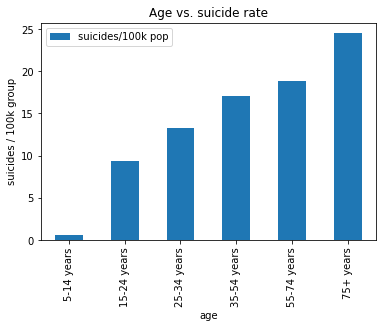

In [13]:
'''
    AGE V/S SUICIDE RATE
'''
age_data = suicide_data.groupby('age').sum()
age_data = age_data.drop(columns=['year', 'HDI for year', 'gdp_per_capita ($)'])
age_data["suicides/100k pop"] = age_data.apply(lambda row: row.suicides_no * 1.0 /  row.population * 100000, axis=1)
age_data['age'] = age_data.index
age_data = age_data.reindex(['5-14 years', '15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
age_data.plot.bar(x='age', y='suicides/100k pop')
plt.title("Age vs. suicide rate")
plt.xlabel("age")
plt.ylabel("suicides / 100k group")

In [14]:
'''We can see above that people in 75+ year age group are more inclined to commit suicide , infact we can see the older the people get more inclined they are towards committing suicide'''

'We can see above that people in 75+ year age group are more inclined to commit suicide , infact we can see the older the people get more inclined they are towards committing suicide'

Text(0, 0.5, 'suicides / 100k group')

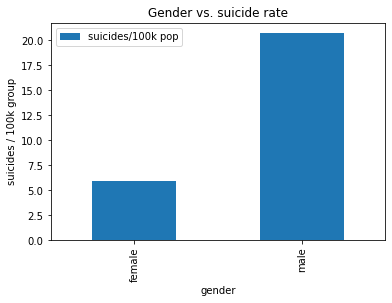

In [15]:
'''
GENDER V/S SUICIDE RATE

'''
gender_data = suicide_data.groupby('sex').sum()
gender_data =gender_data.drop(columns=['year', 'HDI for year', 'gdp_per_capita ($)'])
gender_data["suicides/100k pop"] =gender_data.apply(lambda row: row.suicides_no * 1.0 / \
                                               row.population * 100000, axis=1)
gender_data['sex'] = gender_data.index
gender_data.plot.bar(x='sex', y='suicides/100k pop')
plt.title("Gender vs. suicide rate")
plt.xlabel("gender")
plt.ylabel("suicides / 100k group")

In [16]:
'''We can see above that male gender is inclined towards committing suicide more than female gender'''

'We can see above that male gender is inclined towards committing suicide more than female gender'

In [17]:
'''Country with most and least number of sucides'''
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = suicide_data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = suicide_data[x].idxmax()
    
    high = pd.DataFrame(suicide_data.loc[high_index,:])
    low = pd.DataFrame(suicide_data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",suicide_data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",suicide_data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,9,20996
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,5-14 years,35-54 years
suicides_no,0,22338
population,311000,19044200
suicides/100k pop,0.0,117.3
country-year,Albania1987,Russian Federation1994
HDI for year,NaN,NaN
gdp_for_year ($),"2,156,624,900","395,077,301,248"


In [18]:
'''We can see above that Russian federation has most number of suicides and Albania has least number of suicides'''

'We can see above that Russian federation has most number of suicides and Albania has least number of suicides'

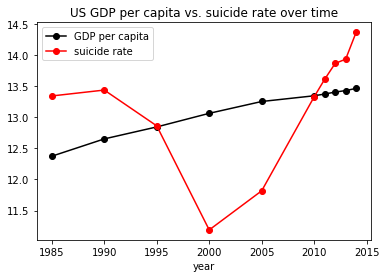

In [19]:
'''
    US line graph between GDP per capita vs suicide rate over years
'''

xs = united_data.index.astype(int)
ys = np.log(united_data['gdp_per_capita'])
zs = (united_data['suicides_per_100k_pop'])
plt.title("US GDP per capita vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o',color = 'black', label = 'GDP per capita')
plt.plot(xs,zs, marker='o',color = 'red',label = 'suicide rate')
plt.legend(loc='upper left')

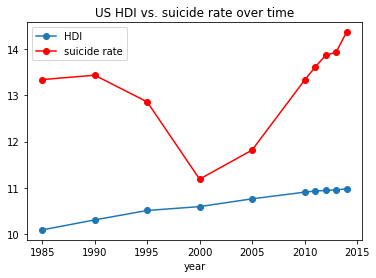

In [20]:
'''
    US line graph between HDI vs suicide rate over years
'''

xs = united_data.index.astype(int)
ys = united_data['HDI_for_year']
zs = (united_data['suicides_per_100k_pop'])
plt.title("US HDI vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o', label = 'HDI')
plt.plot(xs,zs, marker='o',color = 'red',label = 'suicide rate')
plt.legend(loc='upper left')

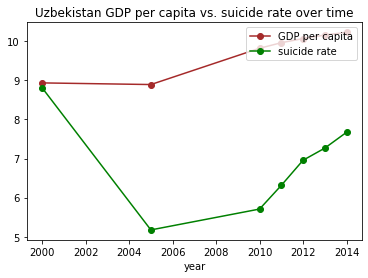

In [21]:
'''
    Uzbekistan line graph between GDP per capita vs suicide rate over years
'''

xs = uzb_data.index.astype(int)
ys = np.log(uzb_data['gdp_per_capita'])
zs = (uzb_data['suicides_per_100k_pop'])
plt.title("Uzbekistan GDP per capita vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o',color = 'brown',label = 'GDP per capita')
plt.plot(xs,zs, marker='o',color = 'green',label = 'suicide rate')
plt.legend(loc='upper right')

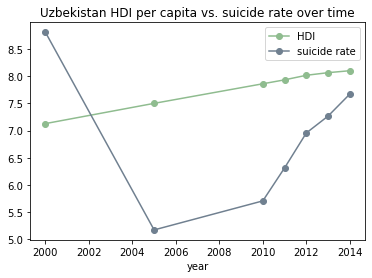

In [22]:
'''
    Uzbekistan line graph between HDI vs suicide rate over years
'''

xs = uzb_data.index.astype(int)
ys = uzb_data['HDI_for_year']
zs = (uzb_data['suicides_per_100k_pop'])
plt.title("Uzbekistan HDI per capita vs. suicide rate over time")
plt.xlabel("year")

plt.plot(xs,ys, marker='o',color = 'darkseagreen',label = 'HDI')
plt.plot(xs,zs, marker='o',color = 'slategrey',label = 'suicide rate')
plt.legend(loc='upper right')

In [23]:
'''
    Linear Regression between suicide rate and gdp per capita
'''
outcome_gdp, predictor_gdp = patsy.dmatrices('suicides_per_100k_pop ~ gdp_per_capita'\
                                             , country_data)
mod_gdp = sm.OLS(outcome_gdp, predictor_gdp)
res_gdp = mod_gdp.fit()
print(res_gdp.summary())

                              OLS Regression Results                             
Dep. Variable:     suicides_per_100k_pop   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.331
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):              0.249
Time:                           11:38:31   Log-Likelihood:                -2411.2
No. Observations:                    684   AIC:                             4826.
Df Residuals:                        682   BIC:                             4836.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

In [24]:
'''Creating a prediction graph between suicide rate and gdp based on our linear regression'''

'Creating a prediction graph between suicide rate and gdp based on our linear regression'

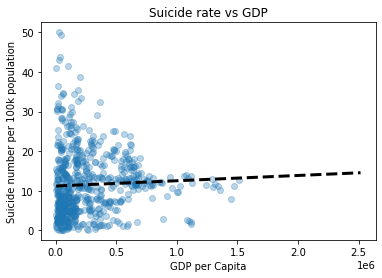

In [25]:
plt.scatter(country_data['gdp_per_capita'], country_data['suicides_per_100k_pop'], \
            alpha=0.3, label='Data')
plt.title('Suicide rate vs GDP')
plt.ylabel('Suicide number per 100k population')
plt.xlabel('GDP per Capita')
xs = np.arange(country_data['gdp_per_capita'].min(), country_data['gdp_per_capita'].max() \
               + 1000000)
ys = 1.33e-06 * xs + 11.1995
plt.plot(xs, ys, '--k', linewidth=3)

In [26]:
'''
    Linear Regression between suicide rate and HDI
'''

outcome_hdi, predictor_hdi = patsy.dmatrices('suicides_per_100k_pop ~ HDI_for_year', \
                                             country_data)
mod_hdi = sm.OLS(outcome_hdi, predictor_hdi)
res_hdi = mod_hdi.fit()
print(res_hdi.summary())

                              OLS Regression Results                             
Dep. Variable:     suicides_per_100k_pop   R-squared:                       0.046
Model:                               OLS   Adj. R-squared:                  0.044
Method:                    Least Squares   F-statistic:                     32.59
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):           1.70e-08
Time:                           11:38:34   Log-Likelihood:                -2395.9
No. Observations:                    684   AIC:                             4796.
Df Residuals:                        682   BIC:                             4805.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2

In [27]:
'''creating a prediction graph between suicide rate and hdi based on our linear regression'''

'creating a prediction graph between suicide rate and hdi based on our linear regression'

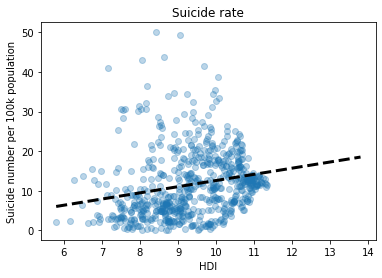

In [28]:

plt.scatter(country_data['HDI_for_year'], country_data['suicides_per_100k_pop'], \
            alpha=0.3, label='Data')
plt.title('Suicide rate')
plt.ylabel('Suicide number per 100k population')
plt.xlabel('HDI')
xs = np.arange(country_data['HDI_for_year'].min(), country_data['HDI_for_year'].max() + 3)
ys = 1.5589 * xs - 2.9990
plt.plot(xs, ys, '--k', linewidth=3)







# Multiple regression model

In [37]:

Xvar= country_data[['HDI_for_year','gdp_per_capita']]
Yvar= country_data[['suicides_per_100k_pop']]

In [38]:
linearModel= sm.OLS(Yvar,Xvar).fit()
print(linearModel.summary())

                                  OLS Regression Results                                  
Dep. Variable:     suicides_per_100k_pop   R-squared (uncentered):                   0.681
Model:                               OLS   Adj. R-squared (uncentered):              0.680
Method:                    Least Squares   F-statistic:                              728.7
Date:                   Sat, 16 Jul 2022   Prob (F-statistic):                   4.94e-170
Time:                           11:57:48   Log-Likelihood:                         -2393.0
No. Observations:                    684   AIC:                                      4790.
Df Residuals:                        682   BIC:                                      4799.
Df Model:                              2                                                  
Covariance Type:               nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------